In [21]:
from skimage import img_as_uint, img_as_ubyte, img_as_bool, img_as_float
from skimage.io import imread, imshow, imsave, find_available_plugins
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity
from skimage.viewer import ImageViewer
from skimage.filters import try_all_threshold, gabor, threshold_otsu, threshold_mean, threshold_minimum, \
threshold_local, frangi, gaussian  
from skimage.morphology import skeletonize, skeletonize_3d, thin, disk
from skimage.util import invert
from skimage.feature import canny, orb
from skimage.filters.rank import enhance_contrast, autolevel
from skimage.segmentation import felzenszwalb
from PIL import Image, ImageDraw
import shutil 

import os
import numpy as np
#sns.set(style='whitegrid')
import json

import matplotlib
import matplotlib.pyplot as plt
minutiae_position=[]
minutiae_position=[]
template_features=[] 
probe_features=[]
probe_identity=[]
filenam=""
%config InlineBackend.figure_formats = {'png', 'retina'}

In [22]:
%matplotlib inline

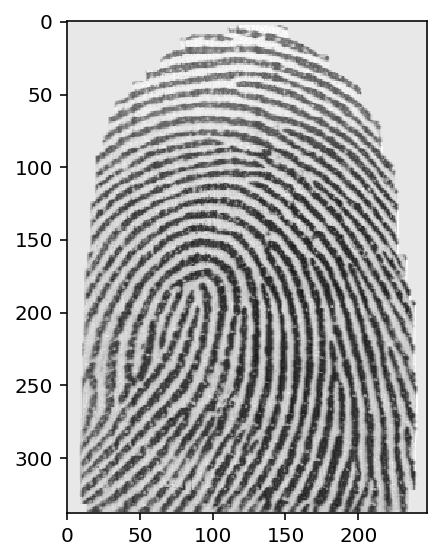

In [23]:
img = imread("data/raw_data/png/1_8.png", as_gray = True)
imshow(img)

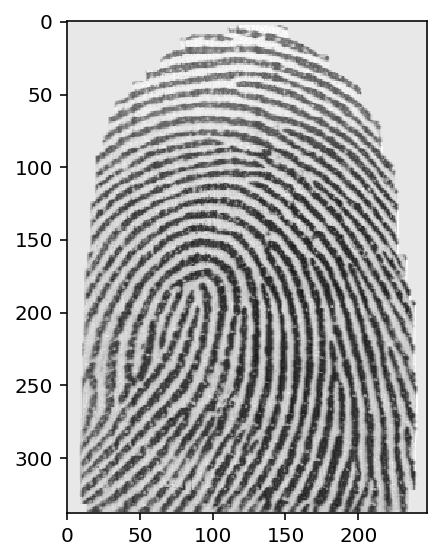

In [24]:
img_intensity_scale = rescale_intensity(img, in_range= "dtype")
imshow(img_intensity_scale)

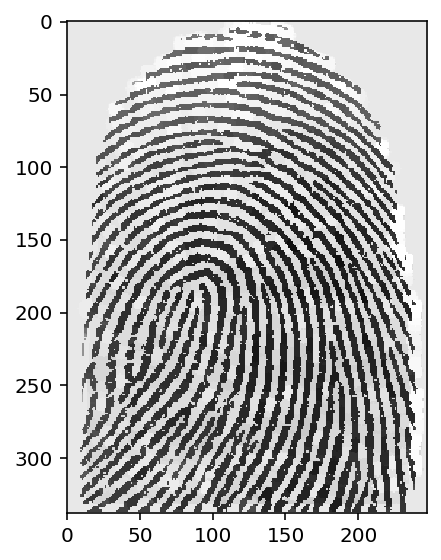

In [25]:
img_enhanced_contrast = enhance_contrast(img_intensity_scale, disk(5))

imshow(img_enhanced_contrast)

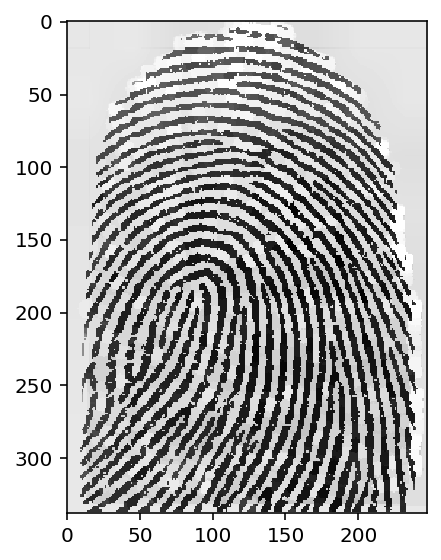

In [26]:
img_equalized = equalize_adapthist(img_enhanced_contrast, clip_limit= 0.01)
imshow(img_equalized)

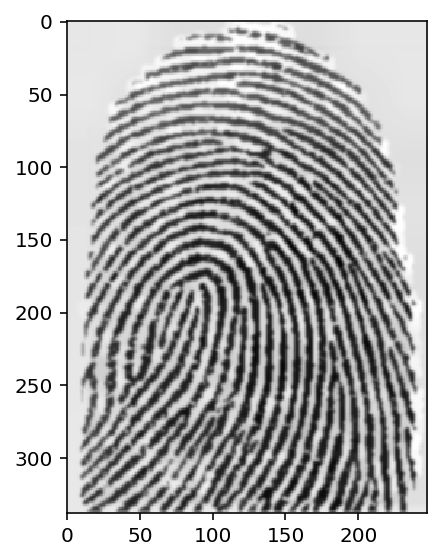

In [27]:
img_smoothed = gaussian(img_equalized)

imshow(img_smoothed)

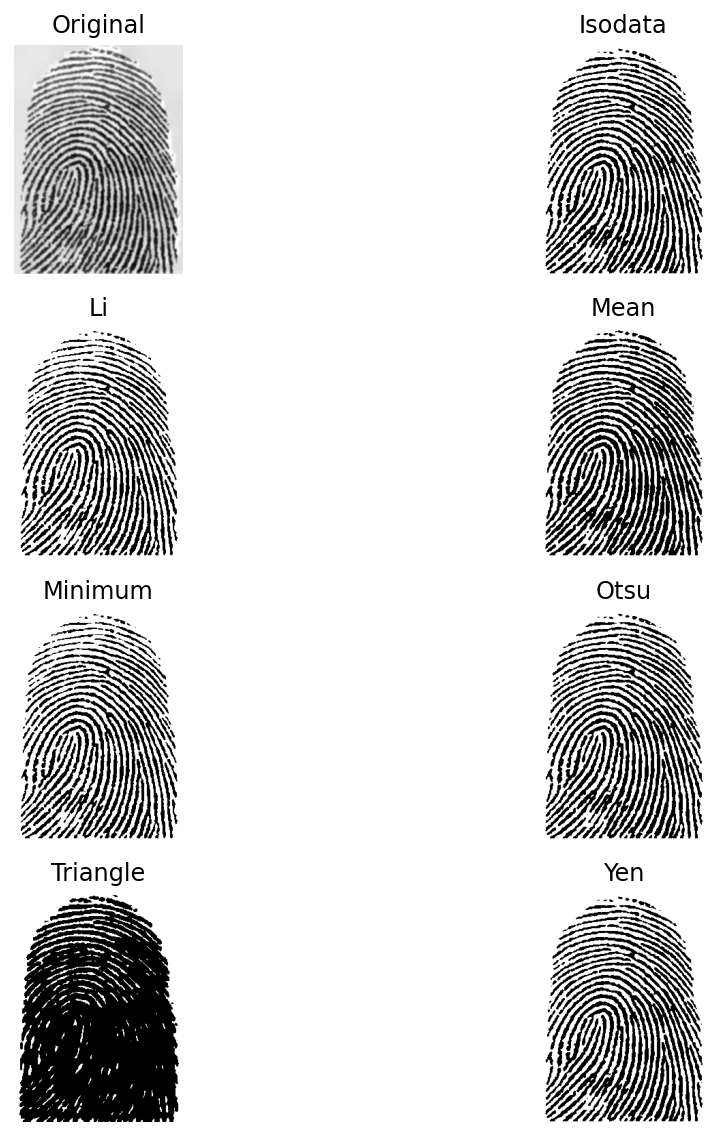

In [28]:
fig, ax = try_all_threshold(img_smoothed, figsize=(10, 8), verbose=False)
plt.show()

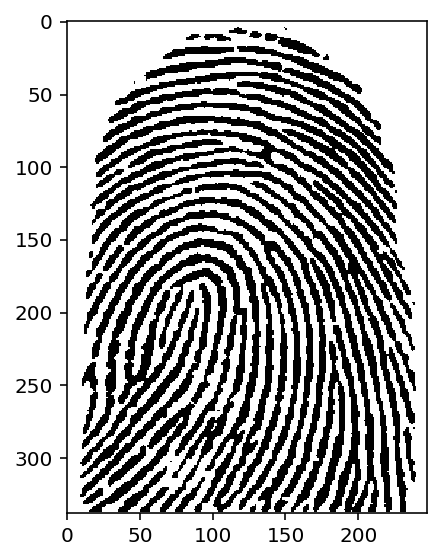

In [29]:
thresh_local = threshold_local(img_smoothed, 125, 'mean', mode = "reflect")
img_binarized = img_smoothed > thresh_local
img_smoothed=img_smoothed.astype(np.float32)
thresh_local=thresh_local.astype(np.float32)
img_binarized= np.greater(img_smoothed, thresh_local)
img_binarized = img_smoothed > thresh_local
img_binarized = (img_smoothed.astype(np.float32) > thresh_local.astype(np.float32)).astype(np.bool)
imshow(img_binarized)

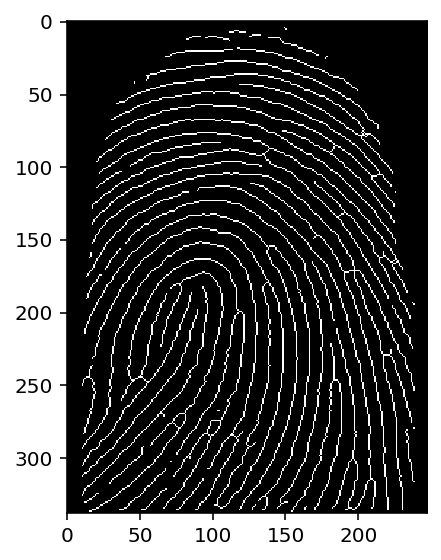

In [30]:
img_thinned = thin(invert(img_binarized))
imshow(img_thinned)

In [31]:
from verify import run_simulation, load_config
from core import match

#from verify import load_config
import collections

import pandas as pd
import numpy as np

def compute_match_scores(results, threshold):
    match_scores = [1 if raw_score >= threshold else 0 for raw_score in results.scores]
    return match_scores

def compute_FNMR(match_scores):
    FNMR = 100-compute_FMR(match_scores)
    return FNMR

def compute_FMR(match_scores):
    FMR = (float(sum(match_scores))/(len(match_scores)))*100
    return FMR

if __name__=="__main__":
    config = load_config()
    db = config["db"]

    #genuine_results = run_simulation(matcher, db, True)
    #fraud_results = run_simulation(matcher, db, False)
    
    genuine_results = pd.read_csv("results/results_png_genuine.csv",sep='\t', index_col = 0)
    fraud_results = pd.read_csv("results/results_png_fraud.csv",sep='\t', index_col = 0)
    
    thresholds = [round(thresh,2) for thresh in np.arange(0.0, 1.01, 0.01)]
    FNMR_rates= []
    FMR_rates= []
    for threshold in thresholds:
        match_scores = [compute_match_scores(results,threshold) for results in [genuine_results,fraud_results]]
        FNMR_rates.append(compute_FNMR(match_scores[0]))
        FMR_rates.append(compute_FMR(match_scores[1]))
    if FMR_rates[0]>80:
        print('"Finger Print matched!!"');
    else:
        print('"Finger Print not matched!!"')
    

"Finger Print matched!!"


In [32]:
# df = pd.DataFrame({"threshold":thresholds,"FNMR":FNMR_rates,"FMR":FMR_rates})
# df.head()

In [33]:
# poly_1 = np.polyfit(df.threshold, df.FMR, deg=2)
# poly_2 = np.polyfit(df.threshold, df.FNMR, deg=2)

# df["FMR_fitted"]  = np.polyval(poly_1, df.threshold)
# df["FNMR_fitted"]  = np.polyval(poly_2, df.threshold)

In [34]:
# df.plot(x="threshold",y =["FMR_fitted","FNMR_fitted"], kind='line', grid = True, color = ["blue","orange"])
# plt.scatter(df["threshold"], df["FMR"], marker='x', s=10, zorder=1, 
#             linewidth=1, color='grey')
# plt.scatter(df["threshold"], df["FNMR"], marker='x', s=10, zorder=1, 
#             linewidth=1, color='green')

# plt.scatter(x = 0.64, y = 36.5, marker='x', s=80, zorder=5, 
#             linewidth=1, color='black')

In [1]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import imutils
import time
#MAIN PAGE FOR FACE RECOGNITION
#get paths of each file in folder named Images
#Images here contains my data(folders of various persons)
imagePaths = list(paths.list_images('C://Users//Dell//anaconda3//envs//myenv//Images'))
knownEncodings = []
knownNames = []
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)
#save emcodings along with their names in dictionary data
data = {"encodings": knownEncodings, "names": knownNames}
#use pickle to save data into a file for later use
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()
faceCascade = cv2.CascadeClassifier('C://Users//Dell//anaconda3//envs//myenv//haarcascade_frontalface_alt2.xml')
data = pickle.loads(open('face_enc', "rb").read())
 
print("Streaming started")
video_capture = cv2.VideoCapture(0)
print("hi")
k=1
# loop over frames from the video file stream
while k:
    # grab the frame from the threaded video stream
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
 
    # convert the input frame from BGR to RGB 
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # the facial embeddings for face in input
    encodings = face_recognition.face_encodings(rgb)
    names = []
    # loop over the facial embeddings incase
    # we have multiple embeddings for multiple fcaes
    for encoding in encodings:
       #Compare encodings with encodings in data["encodings"]
       #Matches contain array with boolean values and True for the embeddings it matches closely
       #and False for rest
        matches = face_recognition.compare_faces(data["encodings"],
         encoding)
        #set name =inknown if no encoding matches
        name = "Unknown"
        # check to see if we have found a match
        if True in matches:
            #Find positions at which we get True and store them
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}
            # loop over the matched indexes and maintain a count for
            # each recognized face face
            for i in matchedIdxs:
                #Check the names at respective indexes we stored in matchedIdxs
                name = data["names"][i]
                #increase count for the name we got
                counts[name] = counts.get(name, 0) + 1
            #set name which has highest count
            name = max(counts, key=counts.get)
            k=k+1
 
 
        # update the list of names
        names.append(name)
        # loop over the recognized faces
        for ((x, y, w, h), name) in zip(faces, names):
            # rescale the face coordinates
            # draw the predicted face name on the image
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
             0.75, (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(name)
        break
video_capture.release()
cv2.destroyAllWindows()


Streaming started
hi
Nishita Dash
